In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob

## CST, alpha=.01, dt=1, distribution of final omega

In [11]:
directory = '/rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/'
to_search = directory+'N_History_*.d'
files = glob.glob(to_search)
np.shape(files)

(5252,)

In [14]:
to_search = directory+'History_*.d'
files = glob.glob(to_search)

In [65]:
lst = np.power(10,np.arange(5,12.2,.5,dtype=float))

In [104]:
data = np.loadtxt(files[3])
k=0   # File Index
j=0

s=np.zeros((np.shape(files)[0],np.shape(lst)[0]))
for i in range(1,np.shape(data)[0]):
    #print(i)
    if data[i-1][5]<lst[j] and data[i][5]>lst[j]:
        s[k][j]=data[i-1][6]
        j=j+1
        print(j,np.shape(lst)[0])
        if(j>=np.shape(lst)[0]):
            break

1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 15
Here: 15


In [114]:
s=np.zeros((np.shape(files)[0],np.shape(lst)[0]))
k=0   # File Index
for file in files:
    data = np.loadtxt(file)
    j=0
    for i in range(1,np.shape(data)[0]):
        #print(i)
        if data[i-1][5]<lst[j] and data[i][5]>lst[j]:
            s[k][j]=data[i-1][6]
            j=j+1
            if(j>=np.shape(lst)[0]):
                break
    if(np.mod(k,50) ==0):
        print(k,file)
    k=k+1

0 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_6098.d
50 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_2312.d
100 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_2734.d
150 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_9297.d
200 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_226.d
250 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_8703.d
300 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_6139.d
350 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_169.d
400 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_6446.d
450 /rds/general/user/sdas5/home/EverpresentLambda/CST_Runs/CST_alpha_0.01_time_1/History_9005.d
500 /rds/general/user/sdas5/home/Ev

In [145]:
std = np.zeros(15)
np.shape(std)
for i in range(0,15):
    std[i] = np.std(s[:,i])

In [165]:
h0 = 70.74
rhocr = 2.7754e11 * 1.989e30 * pow(h0 / 100.0, 2)
c2oG = 4.1553e+49
mult = rhocr / c2oG
mult

6.647955352042103e-09

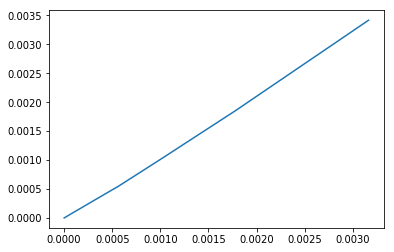

In [169]:
plt.plot(1/np.sqrt(lst),mult*std/0.01)